Project : Investigating a Dataset <br>
Dataset : Titanic Dataset <br>
Name    : Alex Mathew


### Introduction and Aim of Investigation
The csv data given to us is of the passengers onboard the Titanic and we will as part of our investigation, use their information and try to find various relationships with their characteristics and what happened.
The questions I aim to answer :
1. Did gender have a impact on survival ?
2. Did the financial ability of the passenger have an impact on his/her survival ?
3. Any other interesting comparisons

In [12]:
# Importing required stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [27]:
# Reading the csv data
pax = pd.read_csv('titanic-data.csv')

In [28]:
pax.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning the data
As we can see, their are some columns which will not make a difference, such as Cabin. We should also check whether all rows have data or are some rows missing certain information

In [29]:
pax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As we can see, Cabin,Age and the Port column have missing information. Also Name and Ticket columns are inconseqential in our analsysis. So we will first remove them.


In [22]:
paxCleaned = pax.drop(["Name","Ticket"],axis=1)

In [30]:
paxCleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


All our analysis will have to be done keeping in mind that Age, Cabin and Embarged have missing data. Hence to resolve this issue, we will drop the Null rows and do our analysis on the remaining. This will be done on the hypothesis that this small sample will be reflective of the larger populaton.


# GENDER ANALYSIS
We can ask the following questions :
1. Does gender have a relation with the survival rate of passengers in the Titanic ?
2. Is there any relation between the classes and its constituent passenger gender ratio ? 

In [33]:
malePax = paxCleaned[paxCleaned.Sex=='male']
femalePax = paxCleaned[paxCleaned.Sex=='female']

In [44]:
print("Male Passengers: ")
print(malePax.count()['Sex'])

print("Female Passengers: ")
print(femalePax.count()['Sex'])

Male Passengers: 
577
Female Passengers: 
314


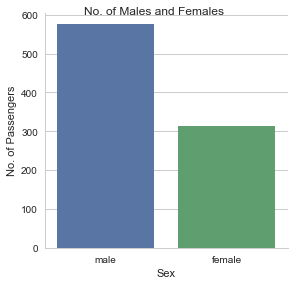

In [277]:
graph1 = sns.factorplot('Sex', data=paxCleaned, kind='count')
graph1.set_ylabels("No. of Passengers")
graph1.fig.suptitle('No. of Males and Females')

As we can see from the above graph, no of male passengers are quite more than female passengers.


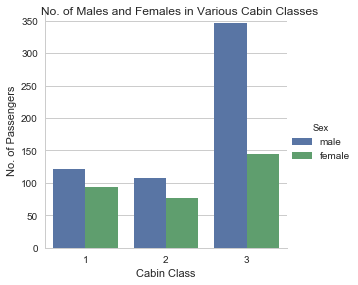

In [280]:
graph2 = sns.factorplot('Pclass',order=[1,2,3], data=paxCleaned, hue='Sex',
kind='count')
graph2.set_ylabels("No. of Passengers")
graph2.set_xlabels("Cabin Class")
graph2.fig.suptitle('No. of Males and Females in Various Cabin Classes')

Thus, the above graph tells us that majority of the men were situated in the 3rd Class while the women folk were more or less evenly distributed.

# Age Analysis
Now we will see how the age parameter affected the distribution of passengers and also during evacuation.
Morally, women and children are supposed to be given priority.
We will divide the population into adults and children and then proceed with our analysis.

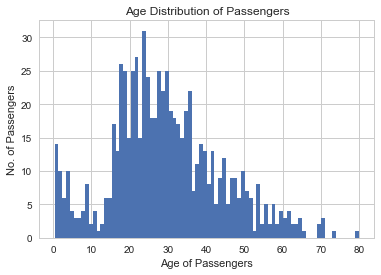

In [300]:
paxCleaned['Age'].max() # Find Bin Size
ax=paxCleaned['Age'].hist(bins=80)
paxCleaned['Age'].mean()
ax.set_xlabel("Age of Passengers")
ax.set_ylabel("No. of Passengers")
plt.title("Age Distribution of Passengers")
# Age Distribution of the Passengers

As we can see, most of the passengers lie between 20 and 30 in the graph, which is verified by our mean age analysis.

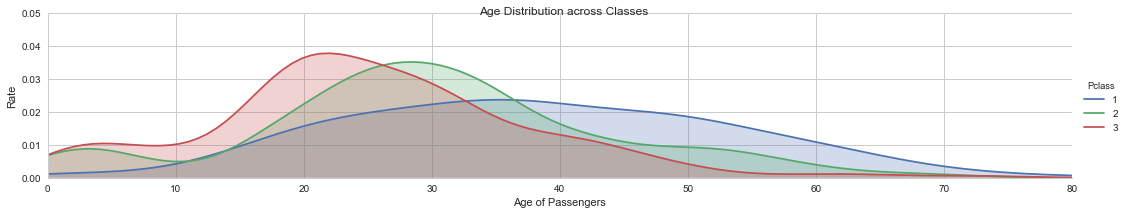

In [283]:
graph3 = sns.FacetGrid(paxCleaned,hue='Pclass', aspect=5, hue_order=[1,2,3])
graph3.map(sns.kdeplot,'Age', shade=True)
graph3.set(xlim=(0,80),ylim=(0,0.05))
graph3.set_ylabels("Rate")
graph3.set_xlabels("Age of Passengers")
graph3.fig.suptitle("Age Distribution across Classes")
graph3.add_legend()

This KDE graph tells us that the age of the passengers in Class 1(more expensive) was more distributed across age range(10 to 70). While the Class 3 passengers included more children and youngsters between the age 10 to 30.

In [112]:
def ageDefine(pax):
 age,sex = pax

 if age < 18:
     return 'child'
 else:
     return sex

# This function will help divide the population into adults and children 
# We use the age of 18 as the legal 'boundary'


In [113]:
# using apply we will use the above method on every row
paxCleaned['status'] = paxCleaned[['Age','Sex']].apply(ageDefine,axis=1)

In [114]:

paxCleaned['status'].value_counts()


male      519
female    259
child     113
Name: status, dtype: int64

From the above two calculations we can see that the number of male passengers were more than the women and children combined.

In [117]:
paxCleaned.head(10)
# So the function works.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,status
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,male
1,2,1,1,female,38.0,1,0,71.2833,C85,C,female
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,female
3,4,1,1,female,35.0,1,0,53.1000,C123,S,female
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,male
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q,male
6,7,0,1,male,54.0,0,0,51.8625,E46,S,male
7,8,0,3,male,2.0,3,1,21.0750,NaN,S,child
8,9,1,3,female,27.0,0,2,11.1333,NaN,S,female
9,10,1,2,female,14.0,1,0,30.0708,NaN,C,child


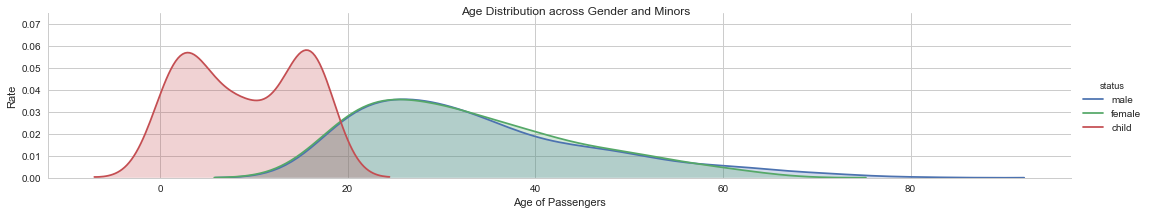

In [286]:
# Plotting distribution using KDE graph
graph4 = sns.FacetGrid(paxCleaned, hue='status', aspect=5, hue_order=['male', 'female', 'child'])
graph4.map(sns.kdeplot,'Age', shade=True)
graph4.set(ylim=(0,0.075))
graph4.set_ylabels("Rate")
graph4.set_xlabels("Age of Passengers")
graph4.fig.suptitle("Age Distribution across Gender and Minors")
graph4.add_legend()

As we can see from the above graph, male and female passengers are evenly distributed across the age groups, however the children lie predominantly towards the two extremes of the 12-18 range.

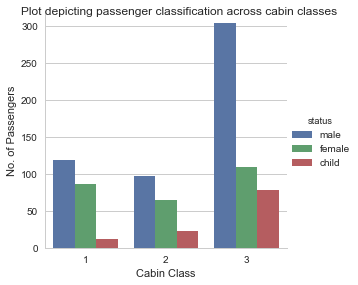

In [287]:
graph5 = sns.factorplot('Pclass',order=[1,2,3], data=paxCleaned, hue='status',kind='count')
graph5.set_ylabels("No. of Passengers")
graph5.set_xlabels("Cabin Class")
graph5.fig.suptitle("Plot depicting passenger classification across cabin classes")

The above graph verifies the social norms of that time :
1. Males are the majority in all classes.
2. The least expensive class holds the majority of the passengers ( Prob the family passengers )

# Cabin Analysis
As we can see from a cursory glance of the csv data, that many passengers dont have a cabin information. But as part of a limited analysis, we can consider only those passengers that do have this data and do an analysis and find out if this was a factor in the success of the evacuation

For that, we first need to consider only the complete rows of the file. So we choose to drop the remaining and copying the rest in another file

In [241]:
cabinData = paxCleaned['Cabin'].dropna()

 # Only survivors
cabinDataSurvivors = paxCleaned[paxCleaned['Survived']==1]
# Copying only the Cabin column into new variable
cabinDataSurvivors = cabinDataSurvivors['Cabin'].dropna()

In [242]:
# identifying cabin types using the first aplhabet of the cabin data and making into a dataframe      
cabinTypes = []
cabinTypesSurvivors = []
for cabin in cabinData:
 cabinTypes.append(cabin[0])
for cabin in cabinDataSurvivors:
 cabinTypesSurvivors.append(cabin[0])
cabinDF = pd.DataFrame(cabinTypes)
cabinDFSurvivors = pd.DataFrame(cabinTypesSurvivors)
cabinDF.columns = ['Cabin']
cabinDFSurvivors.columns = ['Cabin']


In [216]:
# Finding out the various types of cabins
list(cabinDF['Cabin'].unique())
# As we can see, there are 8 possible types

['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

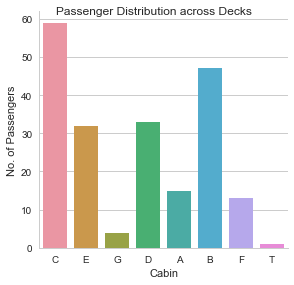

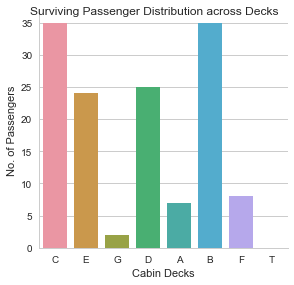

In [288]:
# Finding out the distribution of the passengers acroos the cabin types
graphy = sns.factorplot('Cabin', order=['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], data=cabinDF, kind='count')
graphx = sns.factorplot('Cabin', order=['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], data=cabinDFSurvivors, kind='count')
graphx.set_xlabels("Cabin Decks")
graphx.set_ylabels("No. of Passengers")
graphy.fig.suptitle("Passenger Distribution across Decks")
graphy.set_ylabels("No. of Passengers")
graphx.fig.suptitle("Passengers who survived")
graphx.fig.suptitle("Surviving Passenger Distribution across Decks")


As we can see, most passengers were in Cabin B and C (probably inexpensive) while Cabin G and Cabin T have negligible passengers .

# Survival Factor Analysis
Now that we have the data in the format we need, we can start with the analysis of a passenger surviving having any relationship with the other factors

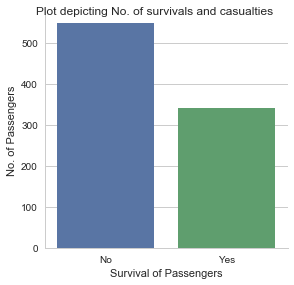

In [289]:
graph6 = sns.factorplot('Survived', data=paxCleaned, kind='count')
graph6.set_ylabels("No. of Passengers")
graph6.set_xticklabels(["No", "Yes"])
graph6.set_xlabels("Survival of Passengers")
graph6.fig.suptitle("Plot depicting No. of survivals and casualties")
# As we can see from the graph below, majority of the passengers did not survive the accident. 

### Now lets see if gender of the passenger had any role in his/her survival possibility.

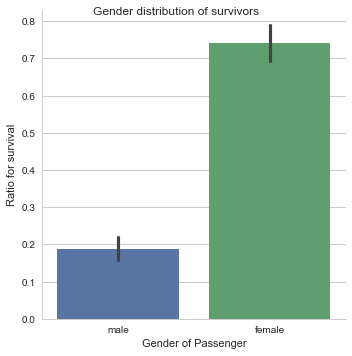

In [290]:
graph7 = sns.factorplot("Sex", "Survived", data=paxCleaned, kind="bar", size=5)
graph7.set_ylabels("Ratio for survival")
graph7.set_xlabels("Gender of Passenger")
graph7.fig.suptitle("Gender distribution of survivors")

As we can from the graph above, a female passenger had more than 70% chances of survival while that of men passengers was a very low 18% .

### Now lets see if class had any relation with the survival of the passenger ?

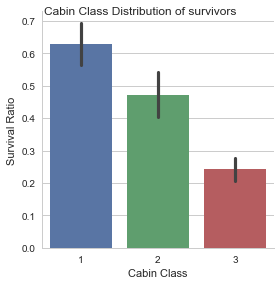

In [291]:
graph8 = sns.factorplot("Pclass", "Survived", order=[1,2,3] , data=paxCleaned , kind="bar")
graph8.set_ylabels("Survival Ratio")
graph8.set_xlabels("Cabin Class")
graph8.fig.suptitle("Cabin Class Distribution of survivors")

As we can see, the passengers in class 1 had a survival possibilty of more than 60% while those in class 3 had only about 24%. Therefore its reasonable to assume that the social status of the passenger did have a reasonable relation with evacuation priority.

# Role of gender and class in survival rate
Now we will combine both the gender and class of the passengers and see how they compare across the spectrum

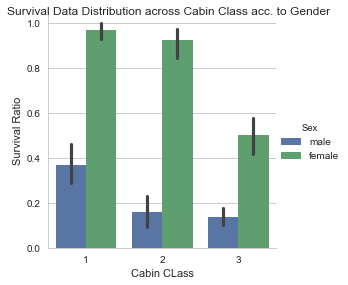

In [293]:
graph9 = sns.factorplot("Pclass", "Survived", order=[1,2,3] , data=paxCleaned , hue='Sex', kind='bar')
graph9.set_ylabels("Survival Ratio")
graph9.set_xlabels("Cabin CLass")
graph9.fig.suptitle("Survival Data Distribution across Cabin Class acc. to Gender")

As we can see from the above graph, females belonging to the expensive Class 1, had an almost wholly successful ratio while it reduces as we move across the class type, decreasing in stature. This proves that, the "Ladies first formula" was probably enforced.

## Role of gender and Age in survival rate
Let us analyse the survival rate among the adults and the children and see whether they were uniform or skewed towards one .

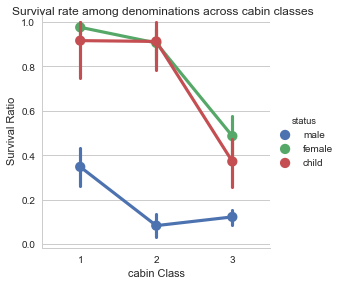

In [294]:
# Trying out point graph
graphz = sns.factorplot("Pclass", "Survived", hue='status', order=[1,2,3] , data=paxCleaned, kind='point')
graphz.set_ylabels("Survival Ratio")
graphz.set_xlabels("cabin Class")
graphz.fig.suptitle("Survival rate among denominations across cabin classes")

As we can see from the above graph, female and children were clearly almost given priority while evacuation, especially in Class 2 which is understandable as it is the naval norm. 

# Age analysis between survivors and non-survivors

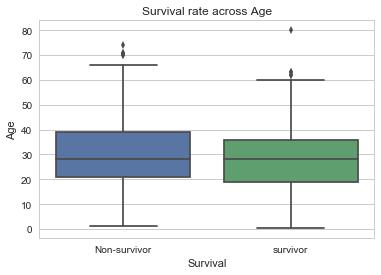

In [295]:
# we use boxplot for the following graphs as it will make clear the difference while depicting the difference between the 2nd and 3rd quartile (majority stats)
# Role of age in survival
graph10 = sns.boxplot(data=paxCleaned, x='Survived', y='Age')
graph10.set(title='Survival rate across Age', xlabel = 'Survival', ylabel = 'Age', xticklabels = ['Non-survivor', 'survivor'])


As we can see from the above graph, the mean age for for the survivors and those who didnt are almost equal to 29 years. However the IQR range for survivors is a litte less as compared to those who perished.

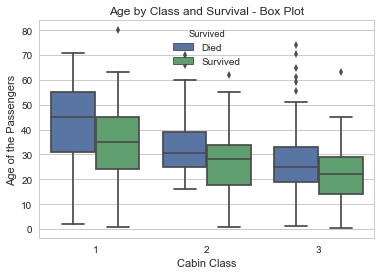

In [268]:

paxAgeNew = pd.DataFrame(paxCleaned.dropna(subset = ['Age']))
paxAgeNew['Survived'].replace({0:'Died', 1:'Survived'}, inplace=True)
graph11 = sns.boxplot(data = paxAgeNew, x='Pclass', y='Age', hue='Survived')
graph11.set(title='Age by Class and Survival - Box Plot', xlabel='Cabin Class',ylabel='Age of the Passengers')


As we can see from the graph, the mean age of the passenger groups of the survivors and the non-survivors went down as the cabin class wen from expensive to cheap.

# Conclusion

While we were quite limited in our analysis due to a few missing data, there were many questions we can answer correctly.

### 1. Was the children and women first policy followed during evacuation ?
Ans.  Yes, its safe to say that the policy was followed as the number of female and child passengers who survived were more than male passengers across the financial spectrum.

### 2. Was age a factor in surviving the disaster ?
Ans. Yes, its safe to say the age was a contributing factor for survival as children were given priority to evacuate and also mean age for survivors was less that mean age for non-survivors.

### 3. Was gender a contributing factor in survival ?
Ans.  Yes, Women folk were given priority for survival in all the 3 classes. This is evident by the vast differnece in their survival rates.

### 4. Did Rich passengers have an advantage over Poorer passengers ?
Ans. Yes. Assuming that the available data for cabin is true for the whole population, we can assume that class type did have a contributing role in evacuation priority. Richer class 1 had a higer survival rate than the other classes.

### Did cabin location have a role in survival of passengers ?
Ans. Since almost all cabins lost around 40-50% of their passengers, we cant really say that cabin played a role in survival. (As seen in graphx)

## Limitations / Observations
1. The missing Age values could be adding an undefined bias to the hypothesis test and conclusions.
2. The Cabin data could have been more useful if we knew the layout of the ship and hence which cabin deck was closer to the evactuation area, thus analysing whether are data matched our hypothesis.
3. Other limitations is the lack of complete data itself. That is, survival itself could be due to evacuation on a lifeboat or from the SOS calls, which might affect the above redings. Other parameters like the passengers health, Stamina etc might have some quantifiable difference in the statistics of those who perished and those who survived.
4. This sample size might be misleading
5. It hasnt been specified that whether this was just the passengers or included the crew too. Crew have certain responsibilities so their addition may skew the statistics.
6. THere should have been some information about the lifeboats. History tells us that some lifeboats were not upto their capacity.
7. Removal of Missing Data could have been replaced by options like replacing with mean or median values.

Hence : It is totally possible that a larger and more complete dataset may be different from the analysis done in this investigation.
